In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

In [28]:
df = pd.read_csv("data/netflix_titles.csv")

In [ ]:
df = df.dropna(subset=["release_year", "type", "rating", "duration", "listed_in"])

In [29]:
df["type_encoded"] = df["type"].map({"Movie": 0, "TV Show": 1})

In [33]:
# Convert duration into numeric (minutes for movies, seasons for TV shows)
def convert_duration(x):
    if pd.isna(x):   # if NaN, return NaN
        return np.nan
    elif "min" in x:
        return int(x.replace("min", "").strip())
    elif "Season" in x:
        return int(x.replace("Seasons", "").replace("Season", "").strip()) * 60  # approx minutes
    else:
        return np.nan

df["duration_minutes"] = df["duration"].apply(convert_duration)


In [34]:
df["main_genre"] = df["listed_in"].apply(lambda x: x.split(",")[0])

In [35]:
features = ["release_year", "rating", "duration_minutes", "main_genre", "country"]

In [36]:
df_encoded = pd.get_dummies(df[features], drop_first=True)

In [38]:
X = df_encoded
y = df["type_encoded"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [40]:
y_pred = rf_model.predict(X_test)

In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Movie", "TV Show"]))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
               precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1227
     TV Show       1.00      1.00      1.00       535

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



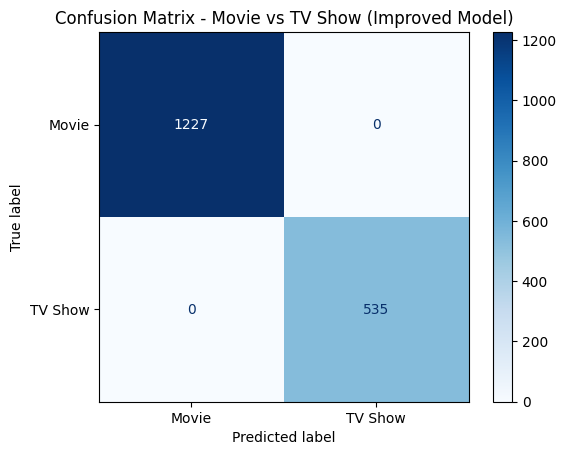

In [42]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Movie", "TV Show"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Movie vs TV Show (Improved Model)")
plt.show()

C:\Users\ashmith\AppData\Local\Temp\ipykernel_24124\1569202906.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


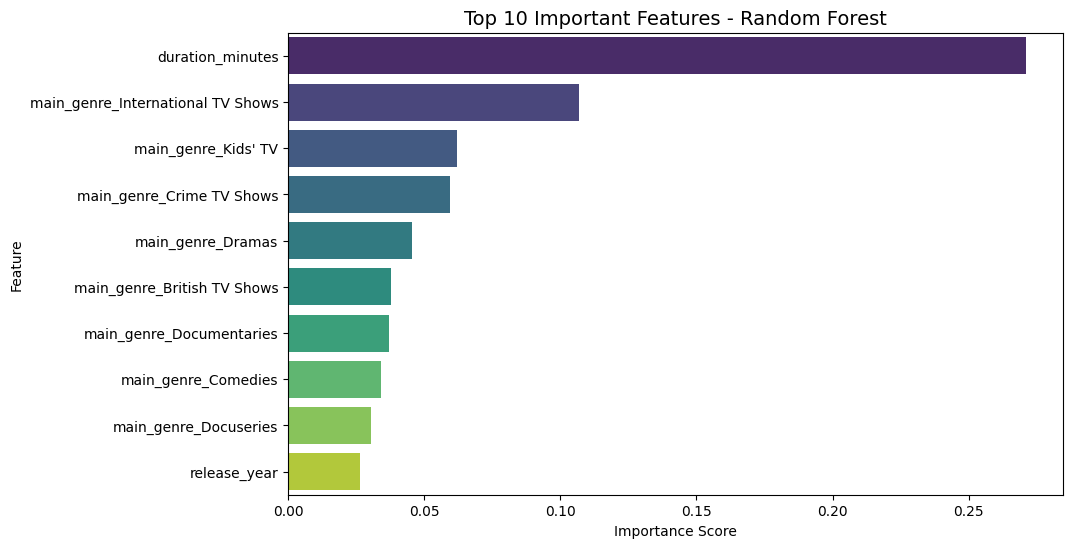

In [44]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)  # Top 10 features

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 10 Important Features - Random Forest", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()